In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
import re
from pprint import pprint
# Gensim
import gensim, logging, warnings
# import spacy
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [172]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [171]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [188]:
df0 = pd.read_csv('scrape1.csv', index_col = 0)
df1 = pd.read_csv('scrape2.csv', index_col = 0)
df2 = pd.read_csv('scrape3.csv', index_col = 0)
df3 = pd.read_csv('scrape4.csv', index_col = 0)
df4 = pd.read_csv('scrape5.csv', index_col = 0)

In [192]:
df4.describe()

,avg_score,ba_score,no_ratings,no_reviews
count,10000.000000,3707.000000,10000.00000,10000.00000
mean,3.863734,86.483140,9.56970,2.34680
std,0.283354,1.811674,6.02101,2.35934
min,2.000000,75.000000,3.00000,0.00000
25%,3.700000,85.000000,5.00000,1.00000
50%,3.890000,87.000000,7.00000,2.00000
75%,4.060000,88.000000,13.00000,3.00000
max,5.000000,91.000000,28.00000,27.00000


In [5]:
df0.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,"6,210","2,048",['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,"4,331","1,163","[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,"3,101","1,225",['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,"1,906",707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...


In [6]:
df1.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,NaN,Year-round,3.50,NaN,Erie Ale Works,https://cdn.beeradvocate.com/im/placeholder-be...,Pennsylvania,Knob Twiddler,1,0,['3.5/5\xa0\xa0rDev 0%look: 3.5 | smell: 3.5 |...,American Brown Ale,https://www.beeradvocate.com/beer/profile/3934...
1,6.7%,Rotating,3.99,NaN,The Big Rip Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Missouri,"ORC (Oatmeal, Raisin, Cookie)",1,0,['3.99/5\xa0\xa0rDev 0%look: 3.75 | smell: 4 |...,American Brown Ale,https://www.beeradvocate.com/beer/profile/3152...
2,5.8%,Year-round,3.65,NaN,Old Mission Brewery / Cerveza Cardera,https://cdn.beeradvocate.com/im/placeholder-be...,Mexico,Baja Brown,1,0,['3.65/5\xa0\xa0rDev 0%look: 3.25 | smell: 3.7...,American Brown Ale,https://www.beeradvocate.com/beer/profile/2433...
3,4.5%,Rotating,3.74,NaN,Twinpanzee Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Virginia,Bob's Brown Ale,1,0,['3.74/5\xa0\xa0rDev 0%look: 4 | smell: 3.75 |...,American Brown Ale,https://www.beeradvocate.com/beer/profile/4111...
4,5.5%,Rotating,4.00,NaN,Iron Furnace Brewing,https://cdn.beeradvocate.com/im/placeholder-be...,New Hampshire,Tramline,1,1,['4/5\xa0\xa0rDev 0%look: 4 | smell: 4 | taste...,American Brown Ale,https://www.beeradvocate.com/beer/profile/5363...


In [7]:
df2.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,7.1%,Rotating,3.67,NaN,Castle Rock Beer Co.,https://cdn.beeradvocate.com/im/placeholder-be...,Colorado,Legend Of Albion,1,0,['3.67/5\xa0\xa0rDev 0%look: 4 | smell: 3.75 |...,American Black Ale,https://www.beeradvocate.com/beer/profile/4386...
1,8.8%,Rotating,4.18,NaN,Hawk Moth Brewery & Beer Parlor,https://cdn.beeradvocate.com/im/placeholder-be...,Arkansas,Woodford DBIPA,1,0,['4.18/5\xa0\xa0rDev 0%look: 4 | smell: 4 | ta...,American Black Ale,https://www.beeradvocate.com/beer/profile/5643...
2,NaN,Rotating,3.73,NaN,Skewed Brewing,https://cdn.beeradvocate.com/im/placeholder-be...,New York,B^2,1,0,['3.73/5\xa0\xa0rDev 0%look: 3.75 | smell: 3.7...,American Black Ale,https://www.beeradvocate.com/beer/profile/3310...
3,6%,Rotating,3.75,NaN,Pour Man's Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Pennsylvania,Dark at 4,1,0,['3.75/5\xa0\xa0rDev 0%look: 3.75 | smell: 3.7...,American Black Ale,https://www.beeradvocate.com/beer/profile/5369...
4,NaN,Rotating,3.58,NaN,King Street Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Alaska,Black IPA,1,0,['3.58/5\xa0\xa0rDev 0%look: 4 | smell: 3.5 | ...,American Black Ale,https://www.beeradvocate.com/beer/profile/2725...


In [146]:
df = pd.concat([df0, df1, df2, df3], axis=0)

In [147]:
df.shape

(35001, 13)

In [11]:
df.tail()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
7689,5.7%,Year-round,4.03,NaN,Bouquet Of Chuvashia (Cheboksarskaya Pivovariya),https://cdn.beeradvocate.com/im/placeholder-be...,Russian Federation,Pennaya Kollektsiya Barkhat,2,2,['4.2/5\xa0\xa0rDev +4.2%look: 4 | smell: 4 | ...,European Dark Lager,https://www.beeradvocate.com/beer/profile/1717...
7690,5.4%,Rotating,3.74,NaN,Gordon Biersch Brewery Restaurant,https://cdn.beeradvocate.com/im/placeholder-be...,United States,Brown,2,1,['3.73/5\xa0\xa0rDev -0.3%look: 4 | smell: 3.5...,European Dark Lager,https://www.beeradvocate.com/beer/profile/1551...
7691,4.9%,Rotating,4.24,NaN,Green Man Brewery,https://cdn.beeradvocate.com/im/placeholder-be...,North Carolina,Czech Dark Lager,2,0,['3.95/5\xa0\xa0rDev -6.8%look: 4.25 | smell: ...,European Dark Lager,https://www.beeradvocate.com/beer/profile/1159...
7692,6.1%,Rotating,3.00,NaN,Turtle Mountain Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,New Mexico,McSmack Scottish Lager,2,0,['3/5\xa0\xa0rDev 0%look: 3 | smell: 3 | taste...,European Dark Lager,https://www.beeradvocate.com/beer/profile/3792...
7693,4.9%,Year-round,3.23,NaN,"Pivovarennyi Dom ""Bavaria""",https://cdn.beeradvocate.com/im/placeholder-be...,Russian Federation,Bavaria Temnoe,2,1,"[""3.45/5\xa0\xa0rDev +6.8%look: 3.5 | smell: 3...",European Dark Lager,https://www.beeradvocate.com/beer/profile/3044...


In [13]:
df = df.reset_index(drop=True)

In [14]:
df.tail()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
22690,5.7%,Year-round,4.03,NaN,Bouquet Of Chuvashia (Cheboksarskaya Pivovariya),https://cdn.beeradvocate.com/im/placeholder-be...,Russian Federation,Pennaya Kollektsiya Barkhat,2,2,['4.2/5\xa0\xa0rDev +4.2%look: 4 | smell: 4 | ...,European Dark Lager,https://www.beeradvocate.com/beer/profile/1717...
22691,5.4%,Rotating,3.74,NaN,Gordon Biersch Brewery Restaurant,https://cdn.beeradvocate.com/im/placeholder-be...,United States,Brown,2,1,['3.73/5\xa0\xa0rDev -0.3%look: 4 | smell: 3.5...,European Dark Lager,https://www.beeradvocate.com/beer/profile/1551...
22692,4.9%,Rotating,4.24,NaN,Green Man Brewery,https://cdn.beeradvocate.com/im/placeholder-be...,North Carolina,Czech Dark Lager,2,0,['3.95/5\xa0\xa0rDev -6.8%look: 4.25 | smell: ...,European Dark Lager,https://www.beeradvocate.com/beer/profile/1159...
22693,6.1%,Rotating,3.00,NaN,Turtle Mountain Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,New Mexico,McSmack Scottish Lager,2,0,['3/5\xa0\xa0rDev 0%look: 3 | smell: 3 | taste...,European Dark Lager,https://www.beeradvocate.com/beer/profile/3792...
22694,4.9%,Year-round,3.23,NaN,"Pivovarennyi Dom ""Bavaria""",https://cdn.beeradvocate.com/im/placeholder-be...,Russian Federation,Bavaria Temnoe,2,1,"[""3.45/5\xa0\xa0rDev +6.8%look: 3.5 | smell: 3...",European Dark Lager,https://www.beeradvocate.com/beer/profile/3044...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 13 columns):
abv           20973 non-null object
avail         22695 non-null object
avg_score     22695 non-null float64
ba_score      3781 non-null float64
brewery       22695 non-null object
img           22695 non-null object
location      22685 non-null object
name          22695 non-null object
no_ratings    22695 non-null object
no_reviews    22695 non-null object
review        22695 non-null object
style         22695 non-null object
url           22695 non-null object
dtypes: float64(2), object(11)
memory usage: 2.3+ MB


In [28]:
df.loc[df['avg_score'] == 0]

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
970,NaN,Year-round,0.0,NaN,Sauber Beer,https://cdn.beeradvocate.com/im/beers/101.jpg,Brazil,Sauber Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/2526...
971,7%,Rotating,0.0,NaN,Rienzbräu,https://cdn.beeradvocate.com/im/beers/101.jpg,Italy,Weihnachtsbock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/2088...
972,6%,Fall,0.0,NaN,Dorset Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,England,Smokin' Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3410...
973,7.3%,Winter,0.0,NaN,Red Bear Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,District of Columbia,Cupid's Black Heart,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/5564...
974,6%,Spring,0.0,NaN,Aukštaitijos Bravorai,https://cdn.beeradvocate.com/im/beers/101.jpg,Lithuania,Aukštaitijos Bravorų Velykinis Porteris Tamsus,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3604...
975,7%,Rotating,0.0,NaN,Bristol Station Brews & Taproom,https://cdn.beeradvocate.com/im/beers/101.jpg,Virginia,Bearded Goat Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/4682...
976,6%,Rotating,0.0,NaN,Le Trou Du Diable,https://cdn.beeradvocate.com/im/beers/101.jpg,Quebec,La P’tite Bockée,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/1360...
977,7%,Winter,0.0,NaN,Brouwerij Wispe,https://cdn.beeradvocate.com/im/beers/101.jpg,Netherlands,Wispe Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3663...
978,NaN,Year-round,0.0,NaN,Slice & Pint,https://cdn.beeradvocate.com/im/beers/101.jpg,Georgia,Rye Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/3498...
979,7.5%,Rotating,0.0,NaN,Brauerei Schanzenbräu,https://cdn.beeradvocate.com/im/beers/101.jpg,Germany,Schanzenbräu Dem Loni Sein Bock,0,0,[],German Bock,https://www.beeradvocate.com/beer/profile/2123...


In [68]:
df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,6210,2048,['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,4331,1163,"[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,3101,1225,['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,1906,707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...


In [37]:
df['style'].nunique()

17

In [150]:
df['no_reviews'] = df['no_reviews'].str.replace(',', '')

In [151]:
df['no_reviews'] = df['no_reviews'].astype(int)

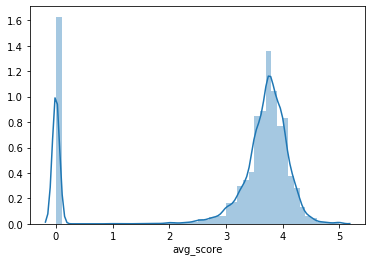

In [152]:
sns.distplot(df['avg_score'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35001 entries, 0 to 12305
Data columns (total 13 columns):
abv           32462 non-null object
avail         35001 non-null object
avg_score     35001 non-null float64
ba_score      8690 non-null float64
brewery       35001 non-null object
img           35001 non-null object
location      34984 non-null object
name          35001 non-null object
no_ratings    35001 non-null int64
no_reviews    35001 non-null int64
review        35001 non-null object
style         35001 non-null object
url           35001 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 3.7+ MB


In [154]:
df.describe()

,avg_score,ba_score,no_ratings,no_reviews
count,35001.000000,8690.000000,35001.000000,35001.000000
mean,3.113856,84.881703,58.093940,16.915774
std,1.416183,4.047656,408.700024,113.496037
min,0.000000,63.000000,0.000000,0.000000
25%,3.270000,83.000000,1.000000,0.000000
50%,3.690000,85.000000,2.000000,1.000000
75%,3.910000,87.000000,9.000000,3.000000
max,5.000000,100.000000,16192.000000,4017.000000


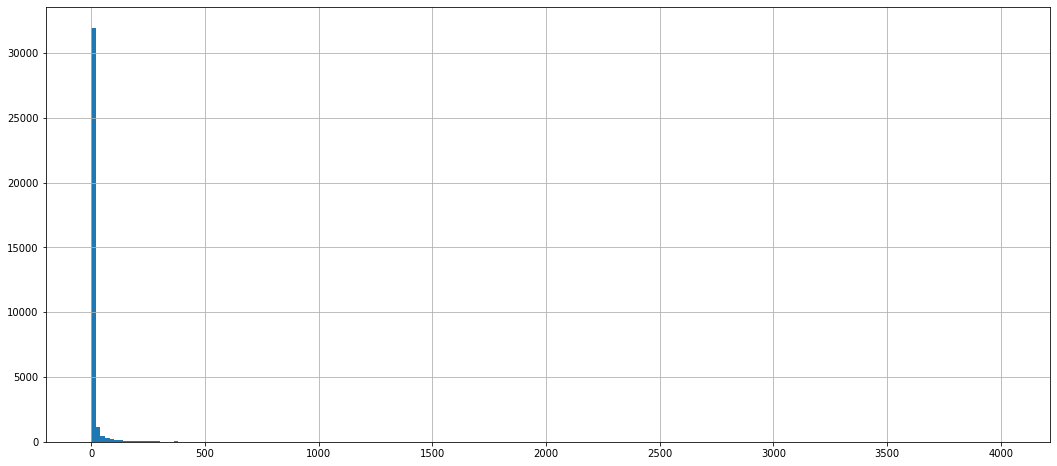

In [155]:
df['no_reviews'].hist(figsize = (18,8), bins=200)

In [117]:
samp_rev_empty = df.iloc[970]['review']

In [119]:
len(samp_rev_empty)

2

In [84]:
type(samp_rev)

str

In [156]:
samp_rev

'[\'3.31/5\\xa0\\xa0rDev -8.1%look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5Alright - this is one of those ‘it depends’ beers. Great deep copper, molasses color and pours with a brief head. Nice mouth feel with a good swallow. LET IT WARM UP A BIT is my best advice. Doesn’t do much when super cold, but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. Not over the top and a reasonable bock buuuut a touch of hops may set some people off. I like this beer with dinner when I’m out eating warm, winter comfort food. Not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\\xa0566 charactersWilliamGustin, Yesterday at 11:04 PM\', \'2.74/5\\xa0\\xa0rDev -23.9%look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75Very pretty copper color with no head to speak of.\\nSmell was disappointing. Maybe toast if I use my imagination...maybe.\\nThe first thing I tasted was hops. And if you like hops, that\\\'s great. B

In [89]:
def clean_review(review):
    cleaned_review = ""
    for char in review:
#         if not '[' in line and  not ']' in line:
        for symbol in ",?!''\n/%":
            char = char.replace(symbol, '').lower()
        cleaned_review += (char)
    return cleaned_review

cleaned_review = clean_review(samp_rev)
cleaned_review

print(cleaned_review)

[3.315\xa0\xa0rdev -8.1look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5alright - this is one of those ‘it depends’ beers. great deep copper molasses color and pours with a brief head. nice mouth feel with a good swallow. let it warm up a bit is my best advice. doesn’t do much when super cold but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. not over the top and a reasonable bock buuuut a touch of hops may set some people off. i like this beer with dinner when i’m out eating warm winter comfort food. not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\xa0566 characterswilliamgustin yesterday at 11:04 pm 2.745\xa0\xa0rdev -23.9look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75very pretty copper color with no head to speak of.\nsmell was disappointing. maybe toast if i use my imagination...maybe.\nthe first thing i tasted was hops. and if you like hops that\s great. but i don\t love them and sa

In [157]:
def get_avg_taste(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("taste: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [158]:
def get_avg_look(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("look: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [159]:
def get_avg_smell(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("smell: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [160]:
def get_avg_feel(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("smell: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [161]:
df['taste_avg'] = df['review'].apply(get_avg_taste)

In [162]:
df['look_avg'] = df['review'].apply(get_avg_look)
df['smell_avg'] = df['review'].apply(get_avg_smell)
df['feel_avg'] = df['review'].apply(get_avg_feel)

In [163]:
df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,6210,2048,['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/,3.56,3.76,3.48,3.48
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,4331,1163,"[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...,3.47,3.76,3.31,3.31
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,3101,1225,['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...,3.65,3.64,3.59,3.59
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,1906,707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...,3.24,3.62,3.27,3.27
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...,3.28,3.69,3.62,3.62


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35001 entries, 0 to 12305
Data columns (total 17 columns):
abv           32462 non-null object
avail         35001 non-null object
avg_score     35001 non-null float64
ba_score      8690 non-null float64
brewery       35001 non-null object
img           35001 non-null object
location      34984 non-null object
name          35001 non-null object
no_ratings    35001 non-null int64
no_reviews    35001 non-null int64
review        35001 non-null object
style         35001 non-null object
url           35001 non-null object
taste_avg     28390 non-null float64
look_avg      28390 non-null float64
smell_avg     28390 non-null float64
feel_avg      28390 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 4.8+ MB


In [165]:
df['style'].nunique()

30

In [167]:
df.nunique()

abv             333
avail             8
avg_score       334
ba_score         38
brewery        9858
img            8283
location        193
name          29283
no_ratings     1080
no_reviews      608
review        29189
style            30
url           35000
taste_avg      1026
look_avg        838
smell_avg      1017
feel_avg       1017
dtype: int64

In [168]:
samp_rev

'[\'3.31/5\\xa0\\xa0rDev -8.1%look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5Alright - this is one of those ‘it depends’ beers. Great deep copper, molasses color and pours with a brief head. Nice mouth feel with a good swallow. LET IT WARM UP A BIT is my best advice. Doesn’t do much when super cold, but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. Not over the top and a reasonable bock buuuut a touch of hops may set some people off. I like this beer with dinner when I’m out eating warm, winter comfort food. Not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\\xa0566 charactersWilliamGustin, Yesterday at 11:04 PM\', \'2.74/5\\xa0\\xa0rDev -23.9%look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75Very pretty copper color with no head to speak of.\\nSmell was disappointing. Maybe toast if I use my imagination...maybe.\\nThe first thing I tasted was hops. And if you like hops, that\\\'s great. B

#### I would like to create a function to clean and tokenize the review text

In [180]:
stop_words.extend(['look', 'smell', 'taste', 'feel', 'overall'])

In [183]:
def clean_review(review):
#     review = re.sub(r'(\\xa){1}\d*(rdev)*', '', review)
    review = re.sub(r'\d+[\.:-]*', '', review)
    cleaned_review = ""
    for char in review:
        for symbol in ",?!''\n/%|:":
            char = char.replace(symbol, '').lower()
        cleaned_review += (char)
    return gensim.utils.simple_preprocess(str(review), deacc=True)

cleaned_review = clean_review(samp_rev)
cleaned_review

print(cleaned_review)

['xa', 'xardev', 'look', 'smell', 'taste', 'feel', 'overall', 'alright', 'this', 'is', 'one', 'of', 'those', 'it', 'depends', 'beers', 'great', 'deep', 'copper', 'molasses', 'color', 'and', 'pours', 'with', 'brief', 'head', 'nice', 'mouth', 'feel', 'with', 'good', 'swallow', 'let', 'it', 'warm', 'up', 'bit', 'is', 'my', 'best', 'advice', 'doesn', 'do', 'much', 'when', 'super', 'cold', 'but', 'nice', 'bread', 'malt', 'aroma', 'maybe', 'touch', 'of', 'spice', 'is', 'in', 'there', 'if', 'you', 'give', 'it', 'chance', 'not', 'over', 'the', 'top', 'and', 'reasonable', 'bock', 'buuuut', 'touch', 'of', 'hops', 'may', 'set', 'some', 'people', 'off', 'like', 'this', 'beer', 'with', 'dinner', 'when', 'out', 'eating', 'warm', 'winter', 'comfort', 'food', 'not', 'range', 'beer', 'to', 'buy', 'to', 'take', 'home', 'but', 'nice', 'beverage', 'on', 'cold', 'night', 'out', 'xa', 'yesterday', 'at', 'pm', 'xa', 'xardev', 'look', 'smell', 'taste', 'feel', 'overall', 'very', 'pretty', 'copper', 'color', '

In [185]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(mess)
        
    # Now just remove any stopwords
    return [word for word in mess.split() if word.lower() not in stopwords.words('english')] 

In [186]:
text_process(samp_rev)

NameError: name 'string' is not defined

In [175]:
for word in samp_rev:
    word = re.sub("\\n", ' ', samp_rev)
samp_rev

'[\'3.31/5\\xa0\\xa0rDev -8.1%look: 4 | smell: 3.5 | taste: 3 | feel: 3.25 | overall: 3.5Alright - this is one of those ‘it depends’ beers. Great deep copper, molasses color and pours with a brief head. Nice mouth feel with a good swallow. LET IT WARM UP A BIT is my best advice. Doesn’t do much when super cold, but a nice bread malt aroma...maybe a touch of spice is in there if you give it a chance. Not over the top and a reasonable bock buuuut a touch of hops may set some people off. I like this beer with dinner when I’m out eating warm, winter comfort food. Not a 4-5 range beer to buy to take home but a nice beverage on a cold night out.\\xa0566 charactersWilliamGustin, Yesterday at 11:04 PM\', \'2.74/5\\xa0\\xa0rDev -23.9%look: 3.5 | smell: 2.5 | taste: 2.75 | feel: 2.75 | overall: 2.75Very pretty copper color with no head to speak of.\\nSmell was disappointing. Maybe toast if I use my imagination...maybe.\\nThe first thing I tasted was hops. And if you like hops, that\\\'s great. B

In [176]:
for word in samp_rev:
    print(word)

[
'
3
.
3
1
/
5
\
x
a
0
\
x
a
0
r
D
e
v
 
-
8
.
1
%
l
o
o
k
:
 
4
 
|
 
s
m
e
l
l
:
 
3
.
5
 
|
 
t
a
s
t
e
:
 
3
 
|
 
f
e
e
l
:
 
3
.
2
5
 
|
 
o
v
e
r
a
l
l
:
 
3
.
5
A
l
r
i
g
h
t
 
-
 
t
h
i
s
 
i
s
 
o
n
e
 
o
f
 
t
h
o
s
e
 
‘
i
t
 
d
e
p
e
n
d
s
’
 
b
e
e
r
s
.
 
G
r
e
a
t
 
d
e
e
p
 
c
o
p
p
e
r
,
 
m
o
l
a
s
s
e
s
 
c
o
l
o
r
 
a
n
d
 
p
o
u
r
s
 
w
i
t
h
 
a
 
b
r
i
e
f
 
h
e
a
d
.
 
N
i
c
e
 
m
o
u
t
h
 
f
e
e
l
 
w
i
t
h
 
a
 
g
o
o
d
 
s
w
a
l
l
o
w
.
 
L
E
T
 
I
T
 
W
A
R
M
 
U
P
 
A
 
B
I
T
 
i
s
 
m
y
 
b
e
s
t
 
a
d
v
i
c
e
.
 
D
o
e
s
n
’
t
 
d
o
 
m
u
c
h
 
w
h
e
n
 
s
u
p
e
r
 
c
o
l
d
,
 
b
u
t
 
a
 
n
i
c
e
 
b
r
e
a
d
 
m
a
l
t
 
a
r
o
m
a
.
.
.
m
a
y
b
e
 
a
 
t
o
u
c
h
 
o
f
 
s
p
i
c
e
 
i
s
 
i
n
 
t
h
e
r
e
 
i
f
 
y
o
u
 
g
i
v
e
 
i
t
 
a
 
c
h
a
n
c
e
.
 
N
o
t
 
o
v
e
r
 
t
h
e
 
t
o
p
 
a
n
d
 
a
 
r
e
a
s
o
n
a
b
l
e
 
b
o
c
k
 
b
u
u
u
u
t
 
a
 
t
o
u
c
h
 
o
f
 
h
o
p
s
 
m
a
y
 
s
e
t
 
s
o
m
e
 
p
e
o
p
l
e
 
o
f
f
.
 
I
 
l
i
k
e
 
t
h
i
s
 
b
e


r
e
f
l
e
c
t
i
o
n
 
(
D
r
i
n
k
i
n
g
 
o
n
e
 
r
i
g
h
t
 
n
o
w
)
 
i
t
 
t
a
s
t
e
s
 
p
r
e
t
t
y
 
g
o
o
d
.
\
n
S
m
e
l
l
s
 
a
 
l
i
t
t
l
e
 
l
i
k
e
 
s
p
i
c
e
 
c
a
k
e
.
\
n
T
a
s
t
e
 
i
s
 
s
p
i
c
y
 
i
n
 
a
 
m
u
t
e
d
 
w
a
y
.
 
P
u
n
k
i
n
 
p
i
e
 
s
p
i
c
e
s
 
a
s
 
i
t
 
w
e
r
e
.
\
n
S
t
i
l
l
 
p
r
e
t
t
y
 
c
h
u
g
-
a
b
l
e
 
a
n
d
 
n
o
t
 
w
a
t
e
r
y
 
a
t
 
a
l
l
.
\
x
a
0
3
1
2
 
c
h
a
r
a
c
t
e
r
s
h
o
t
t
e
n
o
t
,
 
A
p
r
 
0
6
,
 
2
0
1
9
'
,
 
"
3
/
5
\
x
a
0
\
x
a
0
r
D
e
v
 
-
1
6
.
7
%
l
o
o
k
:
 
3
 
|
 
s
m
e
l
l
:
 
3
 
|
 
t
a
s
t
e
:
 
3
 
|
 
f
e
e
l
:
 
3
 
|
 
o
v
e
r
a
l
l
:
 
3
a
n
o
t
h
e
r
 
b
e
e
r
 
b
y
 
S
a
m
 
A
d
a
m
s
 
I
 
d
o
 
n
o
t
 
l
i
k
e
 
t
h
e
r
e
 
i
s
 
m
o
r
e
 
f
o
a
m
 
t
h
e
n
 
b
e
e
r
 
i
n
 
t
h
e
 
g
l
a
s
s
 
a
l
s
o
 
I
 
f
i
n
d
 
i
t
 
a
 
b
i
t
 
o
n
 
t
h
e
 
s
w
e
e
t
 
s
i
d
e
 
I
 
d
o
n
'
t
 
t
h
i
n
k
 
o
r
 
w
i
l
l
 
b
u
y
 
t
h
i
s
 
o
n
e
 
a
g
a
i
n
.
\
x
a
0
1
6
2
 
c
h
a
r
a
c
t
e
r
s
L


e
 
h
e
a
d
.
 
D
o
m
i
n
a
n
t
 
m
a
l
t
s
 
w
i
t
h
 
a
 
h
i
n
t
 
o
f
 
s
p
i
c
e
 
i
n
 
t
h
e
 
a
r
o
m
a
.
 
T
a
s
t
e
 
f
o
l
l
o
w
e
d
 
t
h
e
 
n
o
s
e
,
 
m
a
l
t
s
 
w
i
t
h
 
a
 
h
i
n
t
 
o
f
 
c
i
n
n
a
m
o
n
?
 
M
e
d
i
u
m
 
b
o
d
i
e
d
 
w
i
t
h
 
a
 
s
p
i
c
y
 
o
r
 
f
a
i
n
t
 
s
o
u
r
 
f
i
n
i
s
h
.
 
A
 
g
o
o
d
 
b
r
e
w
 
b
u
t
 
I
 
d
i
d
n
'
t
 
g
e
t
 
m
u
c
h
 
o
f
 
t
h
e
 
f
l
a
v
o
r
 
p
r
o
m
i
s
e
d
 
o
n
 
t
h
e
 
l
a
b
e
l
.
\
x
a
0
3
0
7
 
c
h
a
r
a
c
t
e
r
s
S
o
c
c
e
r
S
e
u
s
s
,
 
D
e
c
 
1
6
,
 
2
0
1
8
"
,
 
'
3
.
4
1
/
5
\
x
a
0
\
x
a
0
r
D
e
v
 
-
5
.
3
%
l
o
o
k
:
 
3
.
5
 
|
 
s
m
e
l
l
:
 
3
 
|
 
t
a
s
t
e
:
 
3
.
5
 
|
 
f
e
e
l
:
 
3
.
7
5
 
|
 
o
v
e
r
a
l
l
:
 
3
.
5
P
o
u
r
e
d
 
a
 
c
o
p
p
e
r
 
b
r
o
w
n
 
w
i
t
h
 
a
 
s
k
i
n
 
t
h
i
n
 
t
a
n
 
h
e
a
d
.
 
A
r
o
m
a
 
o
f
 
m
a
l
t
 
a
n
d
,
 
u
n
f
o
r
t
u
n
a
t
e
l
y
,
 
s
o
a
p
.
 
A
n
d
 
n
o
,
 
t
h
i
s
 
p
o
u
r
 
w
a
s
 
n
o
t
 
i
n
t
o
 
a
 
g
l
a
s
s
 
t
h
a
t
 
w
a


In [184]:

cal = calendar()
# holidays = cal.holidays(start=cdf.index.min(), end=cdf.index.max())

NameError: name 'calendar' is not defined